In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataname = 'C:\\Users\\sarps\\OneDrive\\Desktop\\Semih\\BOUN YL 3.Dönem\\MIS49Y\\archive\\heart_2020_cleaned.csv'
df = pd.read_csv(dataname)
del df['Race']

In [6]:
df[:10000].to_csv('heart_2020_sliced.csv')      #data is too big to upload to moodle, so it is sliced

In [4]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,No,No,Good,12.0,No,No,No


###### Categorical data are converted into numerical data to be able to construct the correlation matrix

In [5]:
df_corr = df.copy()
df_corr = df_corr.replace('No', 0)
df_corr = df_corr.replace('Male', 0)
df_corr = df_corr.replace('Yes', 1)
df_corr = df_corr.replace('Female', 1)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('18-24', 0)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('25-29', 1)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('30-34', 2)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('35-39', 3)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('40-44', 4)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('45-49', 5)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('50-54', 6)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('55-59', 7)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('60-64', 8)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('65-69', 9)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('70-74', 10)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('75-79', 11)
df_corr['AgeCategory'] = df_corr['AgeCategory'].replace('80 or older', 12)
df_corr['GenHealth'] = df_corr['GenHealth'].replace('Poor', 0)
df_corr['GenHealth'] = df_corr['GenHealth'].replace('Fair', 1)
df_corr['GenHealth'] = df_corr['GenHealth'].replace('Good', 2)
df_corr['GenHealth'] = df_corr['GenHealth'].replace('Very good', 3)
df_corr['GenHealth'] = df_corr['GenHealth'].replace('Excellent', 4)

###### Correlation matrix is constructed

In [7]:
df_corr.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,-0.070040,0.233432,-0.100030,-0.243182,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.026940,-0.004744,-0.150616,-0.230720,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,-0.085052,0.128331,-0.097174,-0.174717,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.004200,-0.059528,0.017487,0.029780,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.003091,0.137822,-0.079455,-0.168090,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.040904,0.110763,-0.232283,-0.482697,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.100058,-0.155506,-0.095808,-0.241625,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.068860,0.243263,-0.278524,-0.413797,-0.022216,0.103222,0.153064,0.064840
Sex,-0.070040,-0.026940,-0.085052,-0.004200,0.003091,0.040904,0.100058,0.068860,1.000000,0.067478,-0.048247,-0.025947,0.015704,0.069191,0.009084,-0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,0.067478,1.000000,-0.121687,-0.188381,0.104953,-0.058108,0.123190,0.263537


###### Correlation matrix is visualized using seaborn library

###### GenHealth, AgeCategory and Stroke columns show very high correlation with HeartDisease column, so these columns are selected to be visualized. Additionally, BMI data column shows a small correlation with HeartDisease data, so this column is also selected to be visualised to see if the correlation is really small.

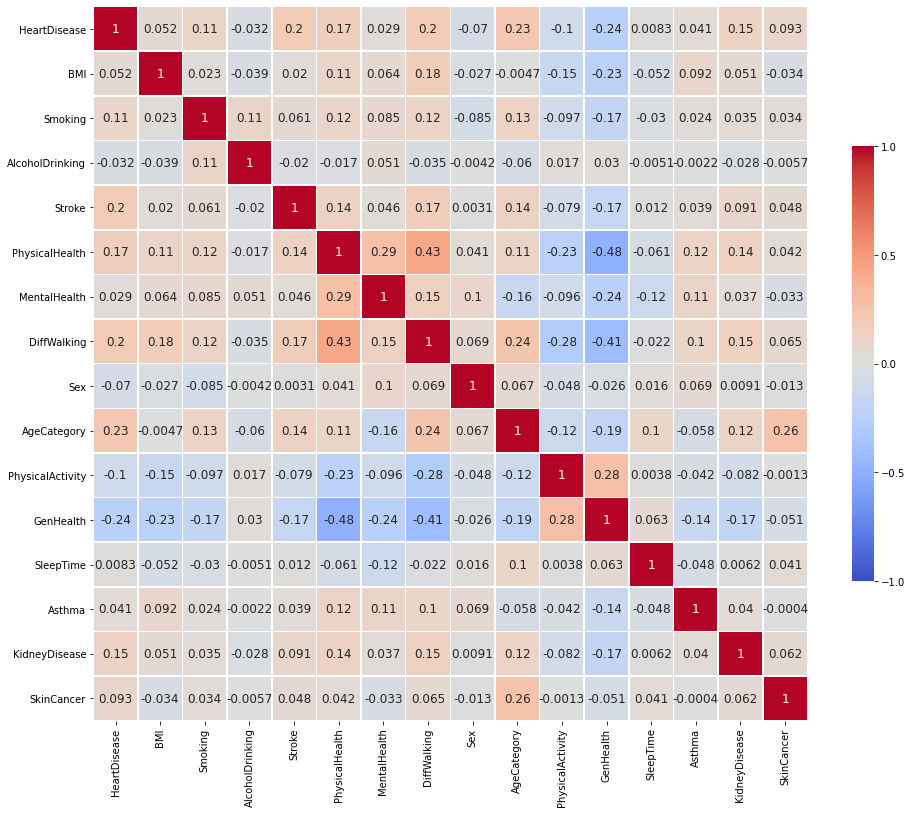

In [15]:
Corr_mat_columns = df_corr.columns.tolist()
corr_matrix = df_corr.corr()

f, ax = plt.subplots(figsize=(16, 20))

heatmap = sns.heatmap(corr_matrix,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

###### The age category frequencies of the people who have a heart disease are visualized.

###### As it can be seen as the person moves to the next age category, the likelihood of having a heart disease increases. Therefore, it is possible to say that there is a high correlation between age category and having a heart disease.

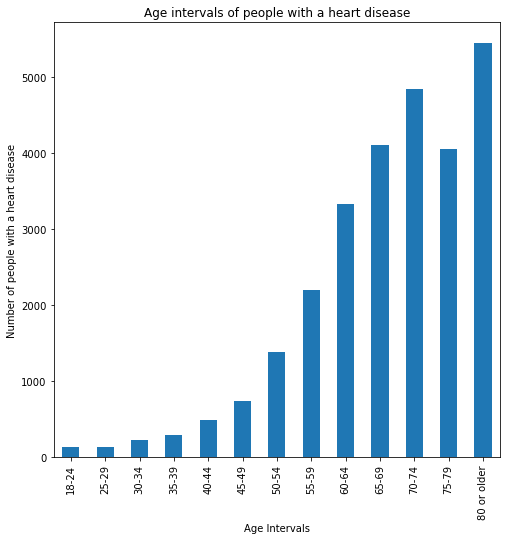

In [16]:
df_HD_True=df[df['HeartDisease'] == 'Yes']
df_HD_False=df[df['HeartDisease'] == 'No']

f, ax = plt.subplots(figsize=(8, 8))

df_HD_True['AgeCategory'].value_counts().loc[['18-24', '25-29', '30-34', '35-39',
                                              '40-44', '45-49', '50-54', '55-59',
                                              '60-64', '65-69', '70-74', '75-79', '80 or older']].plot.bar()
plt.xlabel('Age Intervals')
plt.ylabel('Number of people with a heart disease')
plt.title('Age intervals of people with a heart disease')

plt.show()

###### On the left, a stroke pie chart of the data of people with a heart disease is constructed. On the right, a stroke pie chart of the data of people without a heart disease is present.

###### As it can be seen from the pie charts, a higher percentage of people who have a heart disease happen to have a stroke history compared with the people who does not have a heart disease. Therefore, the fact that there is high correlation between heart disease data and stroke history data is in fact true.

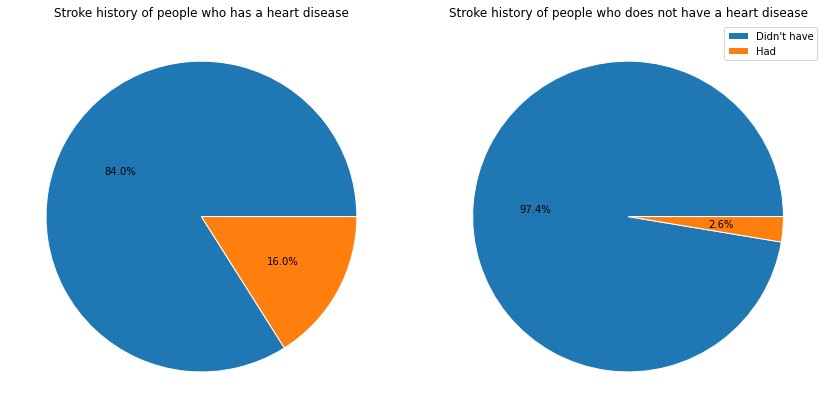

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
label = ['''Didn't have''', 'Had']
axes[0].pie(df_HD_True['Stroke'].value_counts().loc[['No', 'Yes']], 
       autopct = '%1.1f%%', radius=1, center=(1,1),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)

axes[1].pie(df_HD_False['Stroke'].value_counts().loc[['No', 'Yes']], 
       autopct = '%1.1f%%', radius=1, center=(1, 1),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)

axes[0].set_title('Stroke history of people who has a heart disease')
axes[1].set_title('Stroke history of people who does not have a heart disease')

plt.legend(label, loc="best")

fig.tight_layout()

###### Bar plots of General Health Frequencies are constructed for the group of people who have a heart disease and who don't.

###### As it is seen in the bar plots, people who have a heart disease happen to have a higher probability of having a worse general health since the general health data of these people is more right-skewed compared to the data of people who do not have a heart disease.

In [ ]:
df_HD_True['GenHealth'] = df_HD_True['GenHealth'].replace('Poor', 0)
df_HD_True['GenHealth'] = df_HD_True['GenHealth'].replace('Fair', 1)
df_HD_True['GenHealth'] = df_HD_True['GenHealth'].replace('Good', 2)
df_HD_True['GenHealth'] = df_HD_True['GenHealth'].replace('Very good', 3)
df_HD_True['GenHealth'] = df_HD_True['GenHealth'].replace('Excellent', 4)

df_HD_False['GenHealth'] = df_HD_False['GenHealth'].replace('Poor', 0)
df_HD_False['GenHealth'] = df_HD_False['GenHealth'].replace('Fair', 1)
df_HD_False['GenHealth'] = df_HD_False['GenHealth'].replace('Good', 2)
df_HD_False['GenHealth'] = df_HD_False['GenHealth'].replace('Very good', 3)
df_HD_False['GenHealth'] = df_HD_False['GenHealth'].replace('Excellent', 4)

In [72]:
df_genhealth = pd.DataFrame()
GenHealthcount_HDTrue = []
GenHealthcount_HDFalse = []

genhealthlist = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']


for i in range(len(df_HD_True['GenHealth'].unique().tolist())):
    GenHealthcount_HDTrue.append(df_HD_True[df_HD_True['GenHealth'] == i].count()[0])
    GenHealthcount_HDFalse.append(df_HD_False[df_HD_False['GenHealth'] == i].count()[0])



df_genhealth['GenHealth'] = genhealthlist
df_genhealth['HDTrue'] = GenHealthcount_HDTrue
df_genhealth['HDFalse'] = GenHealthcount_HDFalse

Text(0.5, 1.0, 'General Health Frequencies of People, who have a Heart Disease')

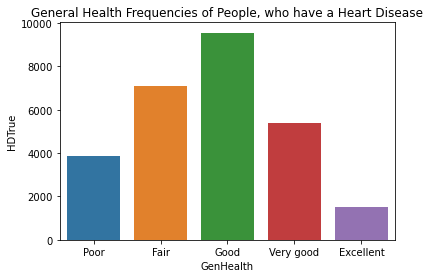

In [73]:
p = sns.barplot(x="GenHealth", y="HDTrue", data=df_genhealth)
p.set_title('General Health Frequencies of People, who have a Heart Disease')

Text(0.5, 1.0, 'General Health Frequencies of People, who has no Heart Disease')

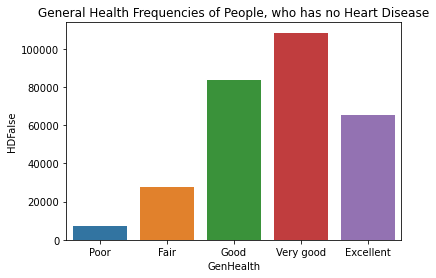

In [74]:
l=sns.barplot(x="GenHealth", y="HDFalse", data=df_genhealth)
l.set_title('General Health Frequencies of People, who has no Heart Disease')

###### kdeplot of BMI density is constructed below.

###### As it stated at the correlation matrix comment, BMI has low correlation with heart disease. This data reveals that BMI densities of people who have a heart disease and who don't are in fact very close. Therefore, it is possible to say that BMI data is not very significant on having a heart disease or not.

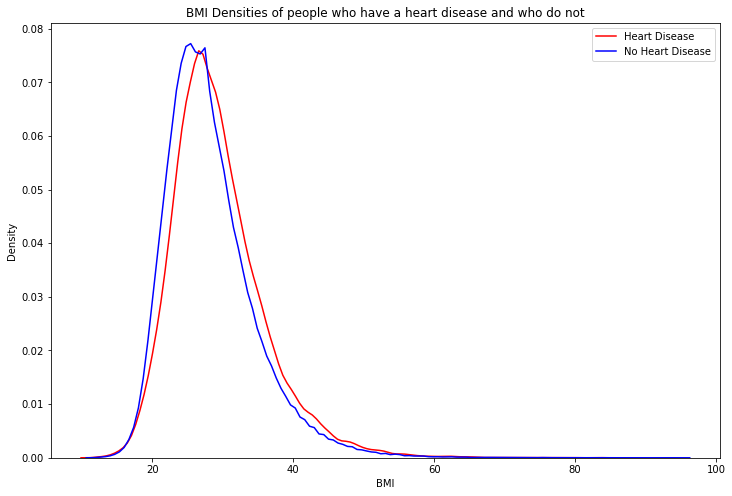

In [103]:
fig, axes = plt.subplots(figsize=(12,8))
sns.kdeplot(data=df_HD_True['BMI'], color='red')
p =sns.kdeplot(data=df_HD_False['BMI'], color='blue')
p.set_xlabel("BMI")
p.set_ylabel("Density")
p.set_title('BMI Densities of people who have a heart disease and who do not')
plt.legend(labels=["Heart Disease","No Heart Disease"])
p